## Многослойный перцептрон

<img src="https://upload.wikimedia.org/wikipedia/ru/thumb/d/de/Neuro.PNG/800px-Neuro.PNG">

$$y=h(\sum_{i=1}^k w_ix_i+w_0)$$
Уже двуслойная сеть может апркосимировать любую функцию

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [6]:
# шкалируем признаки
# разделяем на тестовую и обучающу

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [7]:
# визуализируем оба массива данных на одном графике

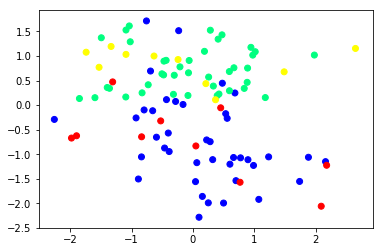

In [19]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='winter')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='autumn')

In [40]:
from sklearn.neural_network import MLPClassifier
alphas = [0.001,0.01,0.05,0.09,0.1,1,10,100,150]
layers = [(10,10),(50,50),(100,100),(50,50,50)]
score = [[0 for i in range(len(alphas))] for j in range(len(layers))]
for i in range(len(alphas)):
    for j in range(len(layers)):
        classifier = MLPClassifier(alpha=alphas[i],hidden_layer_sizes=layers[j])
        classifier.fit(X_train,y_train)
        score[j][i] = classifier.score(X_test,y_test)
# обучаем перцептрон и определяем качество

D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [44]:
max(max(score))

0.94999999999999996

In [42]:
h = 0.02

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

NameError: name 'clf' is not defined

In [ ]:
Zh = Z[:,1].reshape(xx.shape)
plt.contourf(xx, yy, Zh, cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('$\\alpha=10e-5$')

In [63]:
from sklearn.datasets import make_moons, make_circles

datas1 = make_moons(noise=0.3, random_state=0),
datas2 = make_circles(noise=0.2, factor=0.5, random_state=1)

In [64]:
# Повторить на этих датасетах с изменением количества параметров сети